In [1]:
pip install tensorflow keras opencv-python matplotlib numpy 


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# IMG_SIZE = 64
# def preprocess_image(image_path): #functionIteration1
#     image = cv2.imread(image_path)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
#     image = image / 255.0  # Normalize pixel values to [0, 1]
#     return image

In [5]:
import os
import cv2
import numpy as np

IMG_SIZE = 128  # Define the image size

def preprocess_image(image_path):
    if not os.path.exists(image_path):
        print(f"File not found: {image_path}")
        return None  # Skip if file does not exist

    image = cv2.imread(image_path)
    if image is None:
        print(f"Error reading image: {image_path}")
        return None  # Skip unreadable files

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0  # Normalize pixel values to [0, 1]
    return image

# Function to filter valid image files
def get_image_files(directory):
    valid_extensions = {".jpg", ".jpeg", ".png", ".bmp", ".tiff"}
    return [img for img in os.listdir(directory) if os.path.splitext(img)[1].lower() in valid_extensions]

# Only process valid image files
real_images = [preprocess_image(f"real/{img}") for img in get_image_files("real")]
fake_images = [preprocess_image(f"fake/{img}") for img in get_image_files("fake")]

# Remove None values
real_images = [img for img in real_images if img is not None]
fake_images = [img for img in fake_images if img is not None]

# Convert to NumPy array
X = np.array(real_images + fake_images)
y = np.array([0] * len(real_images) + [1] * len(fake_images))  
# 0: Real, 1: Fake

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
 ])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

In [8]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.5732 - loss: 0.7379 - val_accuracy: 0.5806 - val_loss: 0.5908
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.6707 - loss: 0.5431 - val_accuracy: 0.8065 - val_loss: 0.4359
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.7927 - loss: 0.4431 - val_accuracy: 0.8226 - val_loss: 0.3741
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.7886 - loss: 0.3895 - val_accuracy: 0.7258 - val_loss: 0.3599
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.7439 - loss: 0.4064 - val_accuracy: 0.7581 - val_loss: 0.3617
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.7602 - loss: 0.3548 - val_accuracy: 0.7258 - val_loss: 0.3027
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.7967 - loss: 0.3186 - val_accuracy: 0.7742 - val_loss: 0.3376
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.8130 - loss: 0.3101 - val_accuracy: 0.7742 - val_loss: 

In [9]:
model.save("deepfake_model.h5")

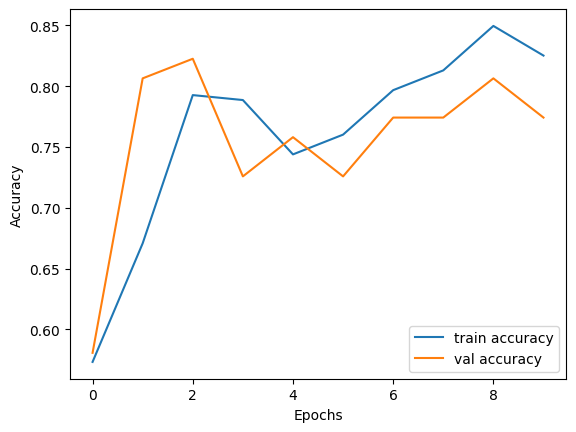

In [10]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8182 - loss: 0.2993
Test accuracy: 0.82


In [12]:
pip install seaborn


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


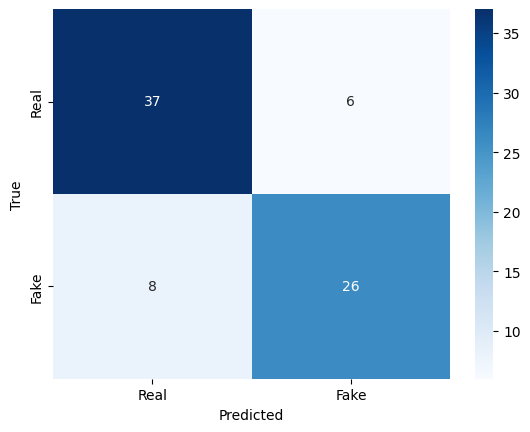

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        43
           1       0.81      0.76      0.79        34

    accuracy                           0.82        77
   macro avg       0.82      0.81      0.81        77
weighted avg       0.82      0.82      0.82        77



In [13]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
y_pred = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(classification_report(y_test, y_pred))